In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dir_path = 'Z:/AION/Data/2024/12/01/Mike PDH Lock Stuff/PDHLockLongTermTrace/'

df = pd.read_csv(dir_path+'scope_0.csv')[1:]
df;

In [3]:
import re

csv_files = []

for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(file)

# Custom sorting key function
def sort_key(file_name):
    match = re.match(r'scope_(\d+)\.csv', file_name)
    return int(match.group(1)) if match else float('inf')

# Sort the csv_files list
csv_files.sort(key=sort_key)
csv_files;

In [4]:
# Initialize an empty list to store DataFrames
data_frames = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(dir_path, file)
    df = pd.read_csv(file_path)[1:]
    data_frames.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
combined_df;

In [6]:
## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


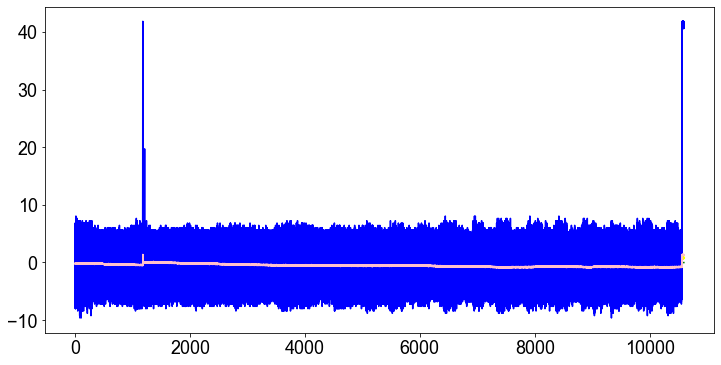

In [59]:
# Extract the data from the combined DataFrame and plot raw data

transmission_photodiode_raw = combined_df.iloc[:,1].astype(float)
error_signal_raw = combined_df.iloc[:,2].astype(float)
fast_out_raw = combined_df.iloc[:,3].astype(float)
slow_out_raw = combined_df.iloc[:,4].astype(float)
time_raw = np.arange(0, len(transmission_photodiode_raw)*0.008, 0.008)

plt.figure(figsize=(12, 6))
plt.plot(time_raw, transmission_photodiode_raw, color = 'yellow', label='Transmission Photodiode')
plt.plot(time_raw, error_signal_raw, color = 'green', label='Error Signal')
plt.plot(time_raw, fast_out_raw, color = 'blue', label='Fast Out')
plt.plot(time_raw, slow_out_raw, color = 'pink', label='Slow Out')

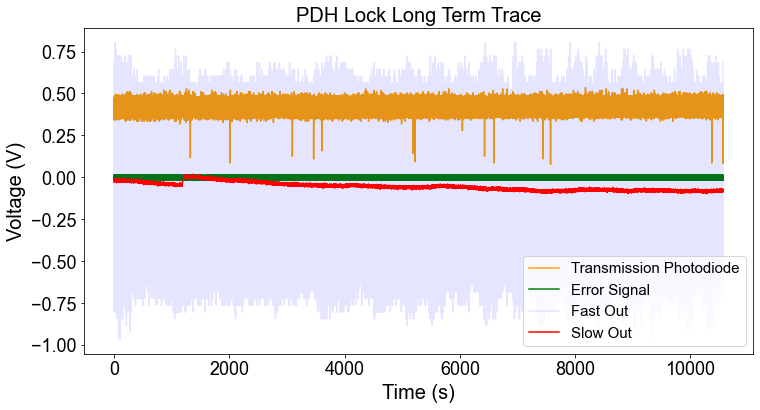

In [72]:
transmission_photodiode = combined_df.iloc[:,1].astype(float)[:1320455]
error_signal = combined_df.iloc[:,2].astype(float)[:1320455]
fast_out = combined_df.iloc[:,3].astype(float)[:1320455]
slow_out = combined_df.iloc[:,4].astype(float)[:1320455]
time = np.arange(0, len(transmission_photodiode)*0.008, 0.008)[:1320455]

fast_out_edited = fast_out.drop(index=range(147115,151196))
slow_out_edited = slow_out.drop(index=range(147115,151196))
error_signal_edited = error_signal.drop(index=range(147115,151196))
transmission_photodiode_edited = transmission_photodiode.drop(index=range(147115,151196))
time_edited = np.delete(time,range(147115,151196))

plt.figure(figsize=(12, 6))
plt.plot(time_edited, transmission_photodiode_edited/10, color = 'orange', label='Transmission Photodiode')
plt.plot(time_edited, error_signal_edited/10, color = 'green', label='Error Signal')
plt.plot(time_edited, fast_out_edited/10, color = 'blue', label='Fast Out',alpha=0.1)
plt.plot(time_edited, slow_out_edited/10, color = 'red', label='Slow Out')
plt.legend(loc='lower right')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('PDH Lock Long Term Trace')
plt.savefig('PDH Lock Long Term Trace.pdf',dpi=1200)

In [ ]:
[]

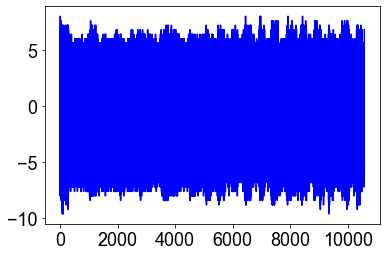

In [57]:
fast_out_edited = fast_out.drop(index=range(147115,151196))
time_edited = np.delete(time,range(147115,151196))
plt.plot(time_edited, fast_out_edited, color = 'blue', label='Fast Out')

In [48]:
fast_out

0         -3.216080
1         -1.206030
2         -2.010050
3          1.608040
4          0.402010
             ...   
1320450   -3.216080
1320451    2.010050
1320452    2.412060
1320453   -1.206030
1320454    6.834171
Name: 3, Length: 1320455, dtype: float64

Indices where fast_out has values more than 10: Int64Index([147115, 147116, 147117, 147118, 147119, 147120, 147121, 147122,
            147123, 147124,
            ...
            147457, 147458, 147459, 147460, 147461, 147462, 150992, 150993,
            151193, 151194],
           dtype='int64', length=352)


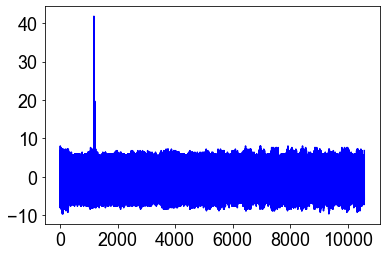

In [37]:
plt.plot(time, fast_out, color = 'blue', label='Fast Out')

# Identify where fast_out has values more than 10
high_fast_out_indices = fast_out[fast_out > 10].index
print("Indices where fast_out has values more than 10:", high_fast_out_indices)

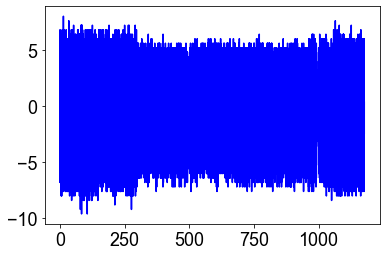

In [42]:
plt.plot(time[:147115], fast_out[:147115], color = 'blue', label='Fast Out')

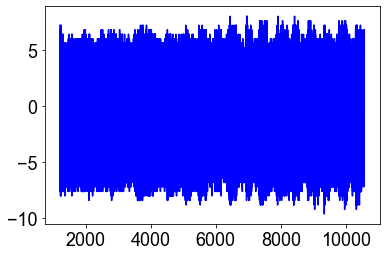

In [47]:
plt.plot(time[151196:], fast_out[151196:], color = 'blue', label='Fast Out')